<center style="color:red;font-size:35px;padding:15px"><b> ĐỒ ÁN CUỐI KỲ </b></center>
<center style="color:blue;font-size:30px;padding:15px"><b> LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU</b></center>
<center style="color:black;font-size:20px;padding:5px"><b><a href="https://github.com/dhptrung/P4DS-FinalProject">Thùng chứa GitHub</a></b></center>

---

| MSSV | Họ và tên | Tài khoản GitHub |
|:----:|:---:|:---:|
|18120066| Bùi Đoàn Hữu Nhân | https://github.com/bdhnhan |
|18120097| Đinh Hữu Phúc Trung| https://github.com/dhptrung |

# Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Thu thập dữ liệu

## Dữ liệu là về chủ đề gì và lấy từ nguồn nào?

- Chủ đề: Về tuổi thọ của các quốc gia, là tập hợp các yếu tố ảnh hưởng đến tuổi thọ trung bình của các quốc gia trên thế giới.
- Nguồn: Tập dữ liệu được lấy từ Kaggle - [WHO national life expectancy](https://www.kaggle.com/mmattson/who-national-life-expectancy)

## Người ta có cho phép dùng dữ liệu như này không?

- Đây là bộ dữ liệu được tác giả công khai và cung cấp theo giấy phép **CC0: Public Domain (Giấy phép Creative Commons)**.
- Với giấy phép trên tác giả từ chối toàn bộ quyền sở hữu đối với bộ dữ liệu này. Bắt cứ ai đều có thể sao chép, sửa đổi, phân phối, ngay cả cho mục đích thương mại mà không cần xin phép.

## Người ta thu thập dữ liệu như thế nào?

- Bộ dữ liệu này được WHO cung cấp và được thu thập từ nhiều nguồn, chủ yếu là sử dụng thông tin của GHO (Đài quan sát sức khỏe toàn cầu) và UNESCO (Tổ chức Giáo dục, Khoa học và Văn hóa Liên Hợp Quốc).
- Tập dữ liệu được sử dụng trong đồ án này là một phần nhỏ các yếu tố ảnh hưởng đến tuổi thọ của 183 quốc gia và trong khoảng thời gian từ năm 2000 đến năm 2016. 

# Khám phá dữ liệu

## Đọc dữ liệu vào dataframe

In [2]:
pd.set_option('display.max_columns', 32) # Để nhìn rõ hơn
df = pd.read_csv('who_life_exp.csv')
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,21.7,11.0,0.5,NaN,32.0,21.0,31.0,41.14431,NaN,NaN,2190.0,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,21.8,10.9,0.5,NaN,60.0,28.0,42.0,42.25467,NaN,NaN,2290.0,2.04631,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,21.9,10.7,0.6,NaN,59.0,22.0,47.0,43.37680,NaN,NaN,2690.0,1.30863,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,22.0,10.5,0.7,NaN,44.0,21.0,46.0,44.36387,NaN,NaN,2820.0,1.46560,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,22.2,10.3,0.8,NaN,43.0,18.0,47.0,45.35134,0.621,NaN,3080.0,1.68663,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
df.shape

(3111, 32)

Dữ liệu có **3111 dòng** và **32 cột**.

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo quan sát sơ bộ về dữ liệu thì mỗi dòng cho biết thông tin về tuổi thọ trung bình và các yếu tố ảnh hưởng đến tuổi thọ trung bình của một quốc gia trong một năm. Không có vấn đề các dòng có ý nghĩa khác nhau.

## Dữ liệu có các dòng bị lặp không?

In [4]:
have_duplicated_rows = df.duplicated().any()
have_duplicated_rows

False

Dữ liệu không có dòng nào bị lặp.

## Mỗi cột có ý nghĩa gì?

| Tên cột | Ý nghĩa của cột | 
|:---------|:-----------------|
| ***country*** | Tên quốc gia |
| ***country_code*** | Mã định danh quốc gia gồm 3 chữ cái |
| ***region*** | Khu vực của quốc gia |
| ***year*** | Năm |
| ***life_expect*** | Tuổi thọ trung bình trong năm |
| ***life_exp60*** | Tỉ lệ dân số có tuổi thọ 60+ |
| ***adult_mortality*** | Tỷ lệ tử vong ở người trưởng thành của cả 2 giới (xác suất tử vong từ 15 đến 60 tuổi trên 1000 dân số)|
| ***infant_mort*** | Tỷ lệ tử vong đến 1 tuổi |
| ***age1-4mort*** | Tỷ lệ tử vong trong độ tuổi từ 1 đến 4 |
| ***alcohol*** | Rượu, mức tiêu thụ bình quân đầu người (15+) được ghi nhận (tính bằng lít rượu nguyên chất) |
| ***bmi*** | BMI trung bình (kg/m^2) (18+) (ước tính theo tuổi được chuẩn hóa) |
| ***age5-19thinness*** | Tỷ lệ gầy ở trẻ em và thanh thiếu niên, BMI < (trung bình - 2s.d.) (ước tính thô) (%) |
| ***age5-19obesity*** | Tỷ lệ béo phì ở trẻ em và thanh thiếu niên, BMI > (trung bình + 2s.d.) (ước tính thô) (%) |
| ***hepatitis*** | Tỷ lệ tiêm chủng viêm gan B (HepB) ở trẻ 1 tuổi (%) |
| ***measles*** | Tỷ lệ tiêm ngừa vắc xin sởi mũi 1 (MCV1) ở trẻ 1 tuổi (%) |
| ***polio*** | Tỷ lệ tiêm chủng bại liệt (Pol3) ở trẻ 1 tuổi (%) |
| ***diphtheria*** | Tỷ lệ tiêm chủng giải độc tố uốn ván và ho gà (DTP3) cho trẻ 1 tuổi (%) |
| ***basic_water*** | Tỷ lệ dân số sử dụng các loại nước uống cơ bản |
| ***doctors*** | Số bác sĩ y khoa (trên 10.000 dân) |
| ***hospitals*** | Mật độ bệnh viện trên 100.000 dân |
| ***gni_capita*** | Tổng thu nhập quốc dân trên đầu người |
| ***gghe-d*** | Chi tiêu chung cho y tế của chính phủ trong nước (GGHE-D) tính theo phần trăm tổng sản phẩm quốc nội (GDP) |
| ***che_gdp*** | Chi tiêu cho y tế hiện tại (CHE) tính theo phần trăm tổng sản phẩm quốc nội (GDP) (%) |
| ***une_pop*** | Dân số (hàng nghìn) |
| ***une_infant*** | Số ca tử vong trung bình ở trẻ sơ sinh (trên 1.000 trẻ đẻ sống) |
| ***une_life*** | Tuổi thọ trung bình theo UNESCO (năm) |
| ***une_hiv*** | Tỷ lệ nhiễm HIV (% dân số từ 15-49 tuổi) |
| ***une_gni*** | GNI bình quân đầu người theo UNESCO (đô la quốc tế hiện tại) |
| ***une_poverty*** | Tỷ lệ nghèo đói ở mức 1,90 đô la một ngày (PPP) (% dân số) |
| ***une_edu_spend*** | Chi tiêu của chính phủ cho giáo dục tính theo tỷ lệ phần trăm của GDP (%) |
| ***une_literacy*** | Tỷ lệ người lớn biết chữ, dân số trên 15 tuổi, cả hai giới (%) |
| ***une_school*** | Số năm đi học trung bình (ISCED 1 trở lên), dân số từ 25 tuổi trở lên, cả hai giới |

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [5]:
df.dtypes

country             object
country_code        object
region              object
year                 int64
life_expect        float64
life_exp60         float64
adult_mortality    float64
infant_mort        float64
age1-4mort         float64
alcohol            float64
bmi                float64
age5-19thinness    float64
age5-19obesity     float64
hepatitis          float64
measles            float64
polio              float64
diphtheria         float64
basic_water        float64
doctors            float64
hospitals          float64
gni_capita         float64
gghe-d             float64
che_gdp            float64
une_pop            float64
une_infant         float64
une_life           float64
une_hiv            float64
une_gni            float64
une_poverty        float64
une_edu_spend      float64
une_literacy       float64
une_school         float64
dtype: object

Tất cả các cột đều đã có kiểu dữ liệu phù hợp.

# Tiền xử lý dữ liệu

Trong dữ liệu có các cột có ý nghĩa tương tự nhau nhưng vì thông tin được lấy từ 2 nguồn khác nhau nên giá trị có lệch nhau đôi chút. Ta sẽ tiến hành loại bỏ đi 1 cột trong các cặp cột có ý nghĩa tương tự nhau, ưu tiên loại bỏ các cột có tỉ lệ giá trị thiếu cao hơn. 

- Cặp "life_expect" và "une_life" (tuổi thọ trung bình)
- Cặp "gni_capita" và "une_gni" (GNI)
- Cặp "infant_mort" và "une_infant" (tỉ lệ tử vong trẻ sơ sinh)

Đồng thời, ta sẽ xóa thêm cột "country_code" vì đây là mã định danh cho quốc gia nên sẽ tương tự với cột tên quốc gia "country".

In [6]:
def missing_ratio(s):
    return s.isna().mean() * 100
cols = ['life_expect', 'une_life', 'gni_capita', 'une_gni', 'infant_mort', 'une_infant']
df[cols].agg([missing_ratio])

,life_expect,une_life,gni_capita,une_gni,infant_mort,une_infant
missing_ratio,0.0,0.0,21.922212,3.760849,0.0,0.0


Do chỉ có cặp "gni_capita" và "une_gni" có tỉ lệ thiếu khác nhau nên ta sẽ chọn xóa cột "gni_capita" vì có tỉ lệ thiếu cao hơn. Hai cặp còn lại ta xóa cột chứa thông tin từ nguồn UNESCO (vì đa số các cột dữ liệu lấy từ nguồn GHO nên ta giữ lại các cột của GHO để dễ đồng nhất).

In [7]:
df.drop(columns=['une_life', 
                 'gni_capita', 
                 'une_infant', 
                 'country_code'], inplace=True)

# Khám phá dữ liệu (tiếp tục)

## Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Với mỗi cột numeric ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Sau đó lưu kết quả vào dataframe `nume_col_profiles_df`.

In [8]:
cate_cols = ['country', 'region']
nume_cols = list(set(df.columns) - set(cate_cols))
def lower_quartile(df):
    return df.quantile(0.25)
def median(df):
    return df.quantile(0.5)
def upper_quartile(df):
    return df.quantile(0.75)
nume_col_profiles_df = df[nume_cols].agg([missing_ratio, min, lower_quartile, median, upper_quartile, max])
nume_col_profiles_df

,une_hiv,polio,adult_mortality,life_exp60,measles,basic_water,gghe-d,une_poverty,une_edu_spend,life_expect,infant_mort,year,une_literacy,age5-19obesity,une_pop,age5-19thinness,hepatitis,diphtheria,bmi,une_school,age1-4mort,che_gdp,alcohol,doctors,hospitals,une_gni
missing_ratio,23.818708,0.610736,0.00000,0.000000,0.610736,1.028608,3.214401,70.652523,41.337191,0.000000,0.000000,0.0,81.645773,1.092896,1.189328e+00,1.092896,18.289939,0.610736,1.092896,74.124076,0.000000,3.760849,1.60720,42.783671,95.821279,3.760849
min,0.100000,8.000000,49.20185,10.728000,16.000000,18.695210,0.062360,0.100000,0.787440,36.227360,0.001470,2000.0,14.376040,0.100000,7.601600e+01,0.100000,2.000000,19.000000,19.800000,0.559340,0.000065,1.025160,0.00000,0.128000,0.000000,420.000000
lower_quartile,0.100000,81.000000,108.26975,16.619485,79.000000,71.658310,1.533445,0.600000,3.262830,63.200095,0.008255,2004.0,72.701130,2.000000,2.195105e+03,1.800000,81.000000,82.000000,23.300000,7.735940,0.000355,4.238798,1.19803,6.391250,0.535162,2970.000000
median,0.400000,93.000000,164.82220,18.508260,92.000000,91.994080,2.601300,3.100000,4.425410,71.597200,0.019995,2008.0,90.953740,5.200000,8.544297e+03,3.800000,92.000000,93.000000,25.500000,10.270400,0.000895,5.758030,3.99356,20.523500,1.072725,8340.000000
upper_quartile,1.500000,97.000000,250.83230,21.099175,96.000000,98.552870,4.278110,12.400000,5.494980,75.537030,0.051720,2012.0,95.786975,8.900000,2.509552e+04,7.800000,97.000000,97.000000,26.500000,12.070610,0.004877,7.850327,7.72342,30.981750,2.104830,20482.500000
max,28.200000,99.000000,696.87420,26.394020,99.000000,100.000010,12.062730,94.100000,14.059080,84.166160,0.164515,2016.0,99.998190,26.700000,1.414049e+06,28.100000,99.000000,99.000000,32.200000,14.378800,0.039095,20.413410,20.18246,79.541000,56.446950,122670.000000


Min và max của các cột không có gì bất thường.

Các cột "hospitals", "doctors", "une_edu_spend", "une_poverty", "une_school", "une_literacy" có tỉ lệ % giá trị thiếu cao nên ta sẽ tiến hành xóa các cột này đi.

In [9]:
df.drop(columns=['hospitals', 
                 'doctors', 
                 'une_edu_spend', 
                 'une_poverty',
                 'une_school', 
                 'une_literacy'], inplace=True)

**Số dòng, số cột của dữ liệu sau khi xóa.**

In [10]:
df.shape

(3111, 22)

**Tiếp tục khám phá các cột numeric**

Xem thử tần suất xuất hiện của các năm trong dữ liệu có bằng nhau không?

In [11]:
df['year'].value_counts().sort_index()

2000    183
2001    183
2002    183
2003    183
2004    183
2005    183
2006    183
2007    183
2008    183
2009    183
2010    183
2011    183
2012    183
2013    183
2014    183
2015    183
2016    183
Name: year, dtype: int64

*Nhận xét:* Mỗi năm đều chiếm 183 dòng trong dữ liệu. Điều này là hợp lý, vì theo mô tả, dữ liệu là thông tin của 183 quốc gia trong 17 năm (2000 - 2016) và mỗi dòng là mỗi quốc gia trong 1 năm.

Trực quan phân phối giá trị của cột "life_expect".

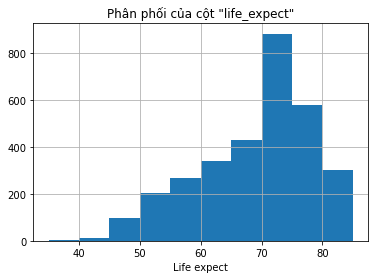

In [12]:
df['life_expect'].hist(bins=np.arange(35, 86, 5))
plt.xlabel('Life expect')
plt.title('Phân phối của cột "life_expect"')
plt.show()

*Nhận xét:* Phân phối dữ liệu của cột "life_expect" chủ yếu rơi vào khoảng 65-80 tuổi.

## Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Với mỗi cột categorical, ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Sau đó lưu kết quả vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"; và có 2 cột là "country", "region". 

In [13]:
pd.set_option('display.max_colwidth', 200) # Để nhìn rõ hơn
def num_diff_vals(s):
    return s.dropna().nunique()
def diff_vals(s):
    return s.dropna().unique()
cate_col_profiles_df = df[cate_cols].agg([missing_ratio, num_diff_vals, diff_vals])
cate_col_profiles_df

,country,region
missing_ratio,0.0,0.0
num_diff_vals,183,6
diff_vals,"[Angola, Burundi, Benin, Burkina Faso, Botswana, Central African Republic, United Republic of Tanzania, Uganda, South Africa, Zambia, Zimbabwe, South Sudan, Sao Tome and Principe, Eswatini, Seyche...","[Africa, Americas, Eastern Mediterranean, Europe, South-East Asia, Western Pacific]"


Không có gì bất thường ở đây cả!

**Tiếp tục khám phá các cột categorical**

Xem thử tần suất xuất hiện của các quốc gia trong dữ liệu như thế nào?

In [14]:
df['country'].value_counts()

Germany        17
Malawi         17
Togo           17
Egypt          17
Angola         17
               ..
Iceland        17
New Zealand    17
Armenia        17
Estonia        17
Philippines    17
Name: country, Length: 183, dtype: int64

*Nhận xét:* Mỗi quốc gia trong dữ liệu đều chiếm 17 dòng (điều này là hợp lý, như đã giải thích ở trên).

Trực quan tần suất xuất hiện của các khu vực trong dữ liệu.

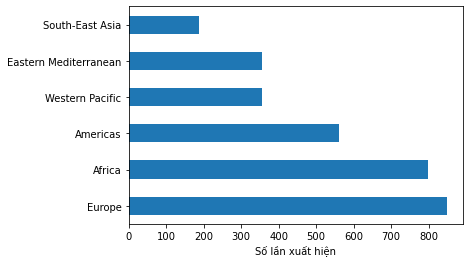

In [15]:
df['region'].value_counts().plot.barh()
plt.xlabel('Số lần xuất hiện')
plt.show()

*Nhận xét*: Như vậy trong dữ liệu, các quốc gia ở khu vực **Europe** là xuất hiện nhiều nhất, sau đó đến khu vực **Africa**, **Americas** và các khu vực khác.

# Đưa ra các câu hỏi cần trả lời

## Câu hỏi là gì?

- **Câu 1:** Thứ tự của các yếu tố trong dữ liệu là như thế nào khi xét theo mức độ tương quan đến tuổi thọ trung bình từ nhiều đến ít?
- **Câu 2:** Top 5 các quốc gia nào có sự cải thiện về tuổi thọ trung bình tốt nhất trong giai đoạn từ năm 2000 - 2016?
- **Câu 3:** BMI trung bình của các khu vực trong 3 năm đầu (2000 - 2002) và 3 năm cuối (2014 - 2016) thay đổi như thế nào?
- **Câu 4:** Trong năm 2016 tỉ lệ tiêm chủng trung bình của các loại vaccine (trong phạm vi tập dữ liệu) của 5 quốc gia có tỉ lệ đó thấp nhất vào năm 2000 thay đổi như thế nào?

## Nếu trả lời được câu hỏi thì sẽ có lợi ích gì?

- **Câu 1:** Câu trả lời cho câu hỏi trên giúp các quốc gia có thể nắm bắt được mức độ ảnh hưởng của các yếu tố đến tuổi thọ trung bình của quốc gia, từ đó quốc gia có thể điều chỉnh chính sách về y tế, giáo dục, kinh tế... để cải thiện tuổi thọ của người dân hoặc kiểm soát tuổi thọ phục vụ cho các chính sách phát triển đất nước.
- **Câu 2:** Câu trả lời cho câu hỏi trên giúp biết được trong vòng 17 năm kể từ năm 2000 đến 2016, qua nhiều sự phát triển về khoa học kỹ thuật và y tế, các quốc gia có sự cải thiện về tuổi thọ trung bình hay không? Qua đó đánh giá được sự cải thiện về đời sống, dịch vụ y tế của từng quốc gia hay các yếu tố sinh hoạt văn hóa khác ẩn trong đó.
- **Câu 3:** Việt Nam chắc thường nghe đến việc tỉ lệ béo phì tại các nước phương Tây có xu hướng cao hơn nhiều so với các quốc gia phương Đông, do một phần các cửa hàng thức ăn nhanh (FastFood) là xu hướng tại các quốc gia phương Tây. Với sự phát triển của thức ăn nhanh chuẩn phương Tây như gà rán, khoai tây chiên, thức uống coca,... Các dịch vụ đó không khó khăn khi bắt đầu tiếp cận với các nước phương Đông như Trung Quốc, Nhật Bản, Hàn Quốc và đặc biệt là Việt Nam. Qua đó, chúng ta muốn xem thử rằng, với sự phát triển đó, thì liệu BMI trung bình tại các nước phương Tây và phương Đông tại thời điểm hiện tại có khác biệt gì so với trước đó khi yếu tố là thức ăn nhanh được phủ rộng và từ đó các quốc gia có thể quyết định đưa ra các chính sách và khuyến cáo để người dân kiểm soát BMI.
- **Câu 4:** Trong những năm gần đây, với sự diễn biến của dịch Covid-19, chúng ta mới dần nhận thấy rõ được tác động trực tiếp của Vaccine đến các loại dịch bệnh. Với sự phát triển của ngành y tế thế giới, nhiều quốc gia đã chủ động nâng cao sức khỏe người dân bằng cách tiêm các loại vaccine khác nhau nhằm tạo ra sự miễn dịch chủ động cho cơ thể. Trong tập dữ liệu là sự thống kê của 4 loại dịch bệnh (hepatitis - viêm gan B, measles - sởi, polio - bại liệt, diphtheria - uốn ván, ho gà), ta muốn xem rằng liệu trong vòng 17 năm, với sự phát triển của y học, liệu các quốc gia trên thế giới (đặc biệt là các quốc gia chậm phát triển, khó tiếp cận với nền y học đó) có được tiếp cận đầy đủ hay chưa, và kết quả cho câu hỏi trên sẽ giúp ta giải quyết thắc mắc đó. Và từ đó các quốc gia khác có thể hỗ trợ để giúp các quốc gia còn chậm phát triển tiếp cận được đầy đủ hơn. 

# Tiền xử lý + phân tích dữ liệu để trả lời câu hỏi

## Câu 1

Mức độ tương quan của các yếu tố ảnh hưởng đối với tuổi thọ trung bình là như thế nào?

- Liệt kê ra các cột là yếu tố ảnh hưởng đến tuổi thọ trung bình, thêm vào list các cột đó cột tuổi thọ trung bình.
- Dùng hàm `corr` để tính hệ số tương quan của từng cặp cột. Sau đó giữ lại các hệ số tương quan của các cột yếu tố ảnh hưởng đối với cột "life_expect" và sắp xếp theo thứ tự giảm dần. Lưu kết quả vào series `order_influence`, trong đó index là các yếu tố, values là các hệ số tương quan.

In [16]:
infor_cols = ['country ', 'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 'year']
influence_cols = list(set(df.columns) - set(infor_cols))
corr = df[influence_cols].corr()
order_influence = corr['life_expect'].drop('life_expect')
order_influence.sort_values(ascending=False, inplace=True)
order_influence

basic_water        0.831099
polio              0.646486
diphtheria         0.640473
measles            0.640408
age5-19obesity     0.621000
gghe-d             0.609787
une_gni            0.603019
bmi                0.597996
alcohol            0.399797
hepatitis          0.341137
che_gdp            0.284920
une_pop            0.032126
une_hiv           -0.511821
age5-19thinness   -0.565396
Name: life_expect, dtype: float64

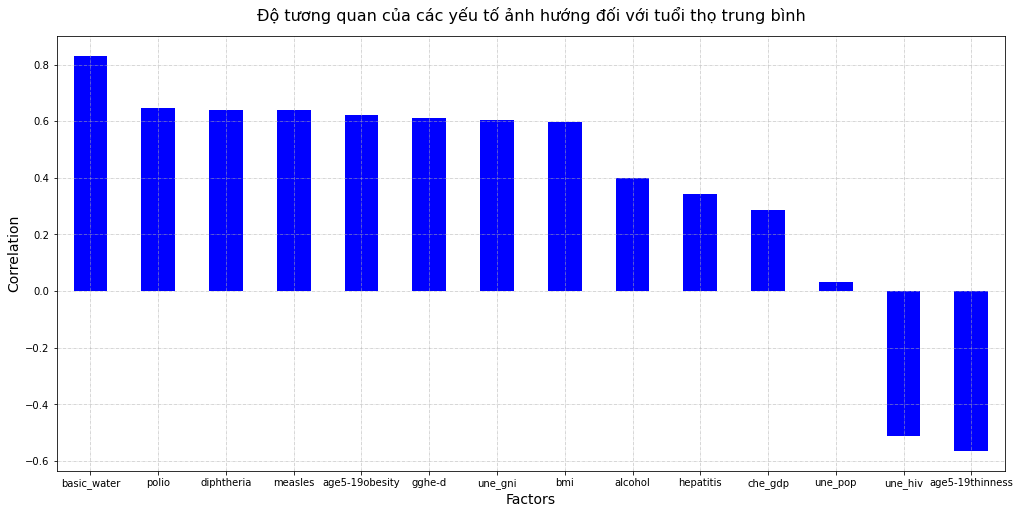

In [17]:
order_influence.plot.bar(rot=0, figsize=(17,8), color='blue')
plt.title('Độ tương quan của các yếu tố ảnh hướng đối với tuổi thọ trung bình', pad=15, fontsize=16)
plt.xlabel('Factors', fontsize=14)
plt.grid(linestyle='-.', linewidth=0.5)
plt.ylabel('Correlation', fontsize=14)
plt.show()

Kết quả thu được cho thấy: 
- Yếu tố "basic_water"(tỷ lệ dân số sử dụng các loại nước uống cơ bản) có ảnh hưởng lớn nhất đến tuổi thọ trung bình. Điều đó càng cho thấy rõ hơn các loại nước uống cơ bản là một phần không thể thiếu trong việc duy trì một sức khỏe tốt.
- Tiếp đến là tỉ lệ tiêm các loại vaccine (polio, diphtheria, measles), từ đó cho thấy được tầm quan trọng của việc tiêm ngừa đối với các loại dịch bệnh, các quốc gia cần tuyên truyền, kêu gọi người dân tiêm đủ các loại vaccine, vì an toàn cho bản thân và tránh trở thành gánh nặng cho gia đình, đất nước. 
- Các yếu tố về kinh tế ("gghe-d": chi tiêu chung cho y tế của chính phủ trong nước, "une_gni": GNI bình quân đầu người) cũng có mối tương quan lớn đối với tuổi trọ trung bình. Các quốc gia có nền kinh tế phát triển, đầu tư, chi tiêu nhiều vào y tế thì sức khỏe, tinh thần của người dân sẽ ổn định, và từ đó càng thúc đẩy kinh tế đất nước đi lên.

## Câu 2

Top 5 các quốc gia nào có sự cải thiện về tuổi thọ trung bình tốt nhất trong giai đoạn từ năm 2000 - 2016?

- Ta tiến hành gom nhóm theo từng quốc gia để tính toán về sự chênh lệch tuổi thọ của năm đầu tiên 2000 và năm cuối cùng 2016. Sau đó sắp xếp theo thứ tự sự chênh lệch về tuổi thọ trung bình của quốc gia đó trong 17 năm giảm dần. Cuối cùng ta lấy 5 giá trị đầu tiên của kết quả trả về.
- Để gom nhóm, ta sẽ sử dụng hàm group_by theo `country`, và lấy giá trị của `life_expect` để tính toán. Sau khi tính toán min, max, sự cải thiện về tuổi thọ trung bình `enhance_expectancy`, ta sắp xếp theo thứ tự giảm dần của giá trị vừa tìm được, là dùng hàm head để in ra top đầu các giá trị được sắp xếp. Ta thu được một bảng dữ liệu các quốc gia có sự cải thiện về tuổi thọ trung bình từ cao đến thấp.

In [18]:
def enhance_expectancy(s):
#   pow(s.iloc[-1]/s.iloc[0],1/17)-1
    return s.iloc[-1]-s.iloc[0]
enhance_df = df.groupby('country')['life_expect'].agg(
    ['min','max', enhance_expectancy]).sort_values('enhance_expectancy', ascending=False)
enhance_df.head(5)

,min,max,enhance_expectancy
country,,,
Rwanda,46.57228,68.03925,21.46697
Eritrea,43.93246,64.96657,21.03411
Malawi,45.90067,64.17274,18.27207
Zambia,44.42588,62.32869,17.90281
Botswana,47.55310,66.05297,16.94230


Để theo dõi rõ hơn sự cải thiện về tuổi thọ trung bình của top 5 quốc gia có sự cải thiện tốt nhất, ta sẽ tiến hành vẽ biểu đồ đường về tuổi thọ trung bình qua các năm (5 đường dạng line ứng với 5 quốc gia), trong đó trục hoành là năm, trục tung là tuổi thọ trung bình.

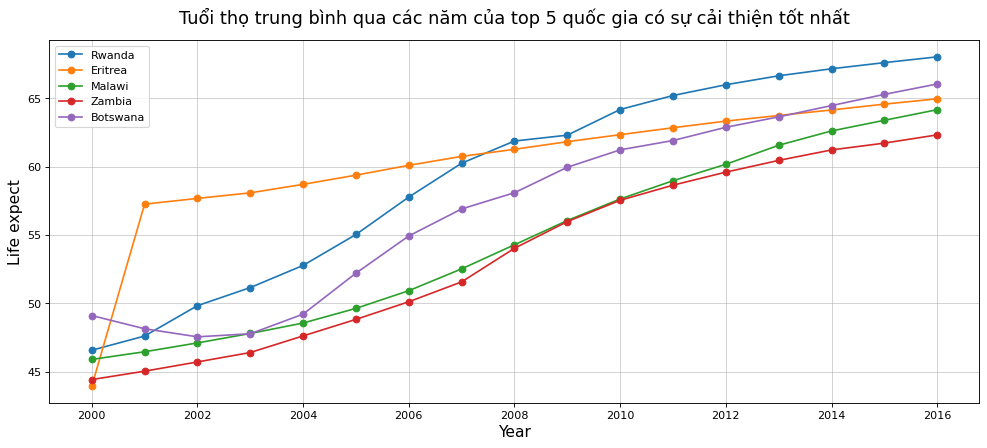

In [19]:
def plot_line(s):
    country_df = df[df['country']==s]
    plt.plot(country_df['year'], country_df['life_expect'], 'o-')

plt.figure(figsize=(15, 6), dpi=80)

for country in enhance_df[:5].index:
    plot_line(country)

plt.legend(enhance_df[:5].index)
plt.title('Tuổi thọ trung bình qua các năm của top 5 quốc gia có sự cải thiện tốt nhất', pad=15, fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Life expect', fontsize=14)
plt.grid(linestyle='-', linewidth=0.5)
plt.show()

- Kết quả thu được là một bảng dữ liệu các quốc gia có sự cải thiện về tuổi thọ trung bình từ cao đến thấp. 
- Ta thấy, Rwanda, Eritrea, Malawi, Zambia, Botswana là quốc gia nằm ở Đông và Nam Phi. Ta được biết vào đầu những năm 2000, các vùng lãnh thổ quốc gia Châu Phi là những quốc gia kém phát triển, đói nghèo, điều đó dẫn đến tuổi thọ thấp. Nhưng ta nhận thấy sau 17 năm, các quốc gia Châu Phi đã có sự cải thiện vượt bậc về tuổi thọ trung bình. Đây có thể là do sự chuyển mình về các chính sách xóa đói giảm nghèo, người dân được no ấm hơn, dẫn đến tuổi thọ cũng được cải thiện tốt hơn.

## Câu 3

BMI trung bình của các khu vực trong 3 năm đầu (2000 - 2002) và 3 năm cuối (2014 - 2016) thay đổi như thế nào?

- Ta tiến hành gom nhóm các vùng khu vực và tính giá trị trung bình của chỉ số bmi theo từng năm của từng khu vực đó. Ta thu được bảng dữ liệu về giá trị trung bình chỉ số bmi của từng năm của từng khu vực. Sau đó, ta tính giá trị trung bình của 3 năm đầu và 3 năm cuối đưa vào bảng dữ liệu mới `df_bmi`.
- Ta dùng hàm groupby để gom nhóm region và year và tính giá trị trung bình chỉ số bmi theo năm đã được gom nhóm. Sau đó, ta tạo một dataframe có 2 cột là `first_year` và `last_year`. Sau đó ta tính giá trị trung bình của 3 năm đầu và 3 năm cuối trong bảng `df_bmi` và đưa kết quả vào lần lượt 2 cột `df_bmi`.

In [20]:
df_bmi_by_year = df.groupby(['region','year'])['bmi'].agg('mean').unstack(1)
df_bmi_by_year.index.name = None
df_bmi_by_year.columns.name = None

df_bmi = pd.DataFrame(index=df_bmi_by_year.index, 
                  columns=["first_year", "last_year"])

df_bmi['first_year'] = df_bmi_by_year[df_bmi_by_year.columns[:3]].mean(axis=1)
df_bmi['last_year'] = df_bmi_by_year[df_bmi_by_year.columns[-3:]].mean(axis=1)

df_bmi

,first_year,last_year
Africa,22.457246,23.489130
Americas,25.717172,27.102020
Eastern Mediterranean,25.623333,26.671667
Europe,25.603333,26.434667
South-East Asia,21.645455,22.990909
Western Pacific,24.917460,26.026984


Từ kết quả ở trên, ta sẽ vẽ biểu đồ cột (2 cột ứng với 2 giai đoạn) cho thấy sự chênh lệch về BMI trung bình của các khu vực trong 3 năm đầu (2000 - 2002) và 3 năm cuối (2014 - 2016), trong đó trục hoành là khu vực, trục tung là BMI trung bình.

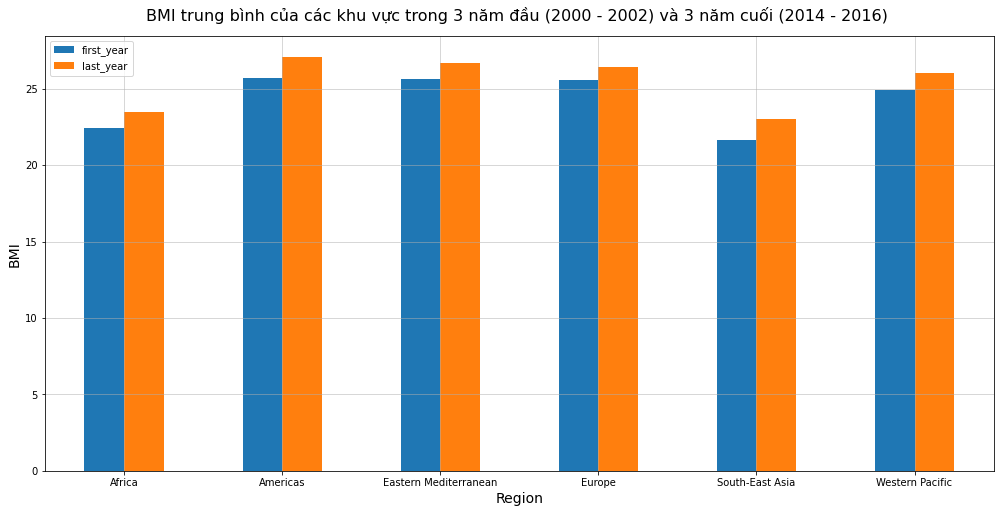

In [21]:
df_bmi.plot.bar(rot=0, figsize=(17,8))
plt.grid(linestyle='-', linewidth=0.5)
plt.title('BMI trung bình của các khu vực trong 3 năm đầu (2000 - 2002) và 3 năm cuối (2014 - 2016) ', pad=15, fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.show()

- Kết quả thu được là một bảng dữ liệu về giá trị trung bình của chỉ số bmi của ba năm đầu và 3 năm cuối của từng khu vực.
- Ta thấy, tại các vùng khu vực Châu Phi, tỉ lệ BMI tại khu vực này có xu hướng tăng nhưng ít, ta có thể đoán là người dân tại khu vực này dần có cuộc sống no đủ hơn trước.
- Ta thấy tỉ lệ người thừa cân (BMI > 24.9) tại các nước vùng America và Europe đang có xu hướng tăng dần, điều này cũng không khó để giải thích vì tại đây thị trường thức ăn nhanh luôn luôn là hình thức được ưu tiên của người dân tại đây, vì chi phí rẻ và nhanh, phù hợp với các quốc gia phát triển.
- Tại các quốc gia Châu Á (phương Đông) vùng South-East Asia, Western Pacific cũng có xu hướng tăng tuy nhiên vùng South-East Asia vẫn thấp nhất các khu vực khác. Ta có thể suy đoán rằng, tại các quốc gia vùng South-East Asia, các quốc gia này chủ yếu là các nước đang phát triển, và có văn hóa ẩm thực đường phố lâu đời, đặc biệt là Việt Nam, thêm một điều nữa là tại các quốc gia phương Đông, đề cao bữa cơm gia đình (những thức ăn có độ thanh đạm cao, tốt cho sức khỏe hơn ăn thức ăn nhanh). 

## Câu 4

Trong năm 2016 tỉ lệ tiêm chủng trung bình (trong phạm vi tập dữ liệu) của 5 quốc gia có tỉ lệ tiêm chủng thấp nhất vào năm 2000 thay đổi như thế nào?

Từ câu 1 ta thấy tỉ lệ tiêm chủng của một quốc gia có ảnh hưởng quan trọng đến tuổi thọ trung bình của quốc gia đó. Ta muốn xem các nước trên thế giới có sự cải thiện gì về việc tiêm chủng cho người dân trong 17 năm qua hay không? Câu trả lời cho câu hỏi trên phần nào giải đáp được thắc mắc này.

### Tiền xử lý

Thêm vào dataframe cột "vaccination" là tỉ lệ tiêm chủng trung bình của các loại vaccine (trong phạm vi tập dữ liệu).

In [22]:
df['vaccination'] = df[['hepatitis', 'measles', 'polio', 'diphtheria']].mean(axis=1, skipna=True)

### Phân tích

Tỉ lệ tăng trưởng của việc tiêm chủng trong giao đoạn 2000 - 2016 của các quốc gia được tính theo công thức: (tỉ lệ năm 2016 - tỉ lệ năm 2000) / tỉ lệ năm 2000 * 100%.
Tính dataframe `vaccine_df` gồm 3 cột (tên là "vaccination_2000", "vaccination_2016", "growth_rate") ứng với tỉ lệ tiêm chủng năm 2000, tỉ lệ tiêm chủng năm 2016 và tỉ lệ tăng trưởng của việc tiêm chủng trong giai đoạn này; index là tên các quốc gia. Sắp xếp theo thứ tự giảm dần của tỉ lệ tăng trưởng, sau đó dùng `head(5)` để in ra top 5 các quốc gia có sự thay đổi (tăng trưởng) lớn nhất. 

In [23]:
vaccine_df = pd.DataFrame()
vaccine_df['country'] = df['country'].unique()

vaccination_2000 = df[df['year']==2000]['vaccination'].array
vaccination_2016 = df[df['year']==2016]['vaccination'].array
vaccine_df['vaccination_2000'] = vaccination_2000
vaccine_df['vaccination_2016'] = vaccination_2016
vaccine_df.sort_values(by='vaccination_2000', inplace=True)
vaccine_df['growth_rate'] = (vaccine_df['vaccination_2016'] - vaccine_df['vaccination_2000']) \
                            / vaccine_df['vaccination_2000'] * 100
vaccine_df.set_index('country', inplace=True)
vaccine_df.head(5)

,vaccination_2000,vaccination_2016,growth_rate
country,,,
Afghanistan,25.000000,67.25,169.000000
Angola,28.000000,53.00,89.285714
Nigeria,31.000000,52.50,69.354839
Somalia,31.333333,44.25,41.223404
Chad,31.333333,40.75,30.053191


Từ kết quả ở trên, ta tiến hành vẽ biểu đồ cột (2 cột ứng với tỉ lệ tiêm chủng năm 2000 và năm 2016) cho thấy được sự thay đổi về tỉ lệ tiêm chủng của top 5 quốc gia có sự tăng trưởng lớn nhất, trong đó trục hoành là quốc gia, trục tung là tỉ lệ tiêm chủng.

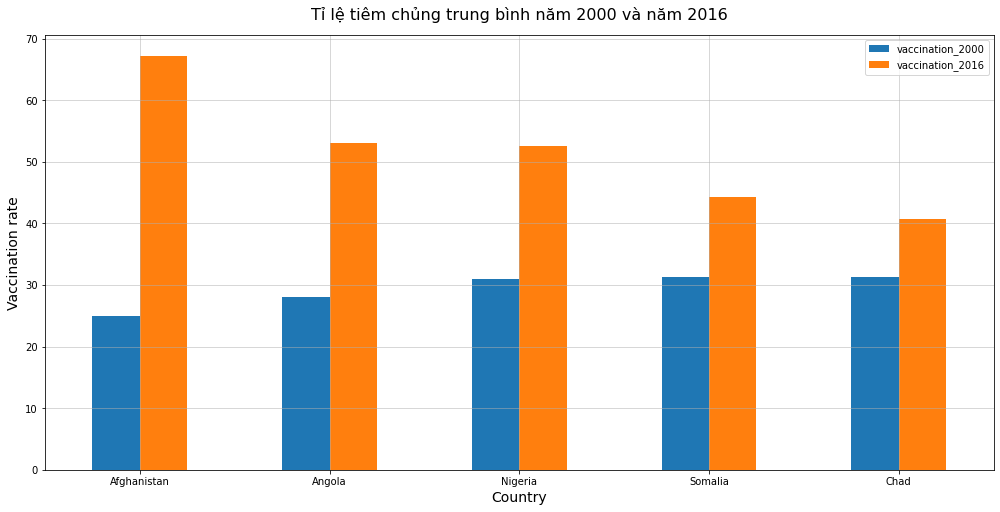

In [24]:
ax = vaccine_df[:5].plot.bar(y=['vaccination_2000', 'vaccination_2016'], rot=0, figsize=(17,8))
plt.grid(linestyle='-', linewidth=0.5)
plt.title('Tỉ lệ tiêm chủng trung bình năm 2000 và năm 2016', pad=15, fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Vaccination rate', fontsize=14)
plt.show()

- Kết quả thu được là một bảng dữ liệu về tỉ lệ tăng trưởng về tiêm chủng của các quốc gia trong giai đoạn 2000 - 2016.
- Ta thấy, tại các vùng khu vực Châu Phi và Đông Địa Trung Hải, tỉ lệ tiêm chủng của các quốc gia có sự tăng trưởng mạnh từ đó cho thấy được các quốc gia ở các khu vực này đã có sự phát triển và tiếp cận với nền y tế thế giới. Đặt biệt là quốc gia "Afghanistan" có sự tăng trưởng rõ rệt nhất, qua 17 năm tỉ lệ tiêm chủng ở quốc gia này tăng gần 170%.

# Nhìn lại quá trình làm đồ án

## Đã gặp những khó khăn gì?

### Bùi Đoàn Hữu Nhân

- Trong quá trình thực hiện đồ án, em có gặp những khó khăn như tìm cách để trực quan những dữ liệu trong dataset. Do dữ liệu ở quá khứ (2000-2016) nên việc phân tích và tìm đáp án cho câu hỏi có đôi chút khó khăn, cần phải tìm nguồn dữ liệu thích hợp để trả lời cho những câu hỏi đó.
- Việc sử dụng các câu lệnh Git để có thể làm việc nhóm cũng là một khó khăn nhỏ đối với em, đặc biệt là khi giải quyết conflict đối với file `.ipynb`. Nhưng nhóm em cũng tìm ra giải pháp quản lí source code để có thể dễ xử lí conflict nhất có thể.

### Đinh Hữu Phúc Trung

- Khó khăn khi dùng git và chia branch để làm việc nhóm, do lần đầu làm việc nhóm theo kiểu này nên ban đầu em có gặp khó khăn đôi chút như là giải quyết conflict, chia branch,...
- Khó khăn khi chọn dataset phù hợp cho đồ án (dataset có thể khai thác được các câu hỏi có ý nghĩa).

## Có học được gì hữu ích không?

### Bùi Đoàn Hữu Nhân

- Qua đồ án, em được luyện tập về cách sử dụng câu lệnh git rất nhiều và cảm thấy nó nhanh so với dùng giao diện. Em cũng học được các cú pháp của python đặc biệt là thư viện `pandas` và `numpy`. 

### Đinh Hữu Phúc Trung

- Học được cách làm việc nhóm qua git và github.
- Ôn lại và trao dồi thêm kiến thức về các thư viện `pandas`, `numpy`, `matplotlib`.

## Nếu có thêm thời gian thì sẽ làm gì?

Nếu có thêm thời gian thì nhóm em sẽ tìm và thu thập nhiều dataset liên quan đến các yếu tố ảnh hưởng đến tuổi thọ, từ đó nhóm có thể khai thác sâu hơn vào các yếu tố đó, đưa ra các hướng xử lý hay, phức tạp hơn và giải đáp được nhiều câu hỏi mà nhóm có thể đặt ra với lượng dataset đó.

# Tài liệu tham khảo

- [Kaggle - WHO national life expectancy](https://www.kaggle.com/mmattson/who-national-life-expectancy)
- [Tài liệu môn học Lập trình cho khoa học dữ liệu - 19_21](https://drive.google.com/drive/folders/1SjFqRRhU3HIuHSGErOcmxX31cYEnAKHE)
- [Thư viện Numpy](https://numpy.org/doc/stable/reference/)
- [Thư viện Pandas](https://pandas.pydata.org/docs/reference/)
- [Thư viện Matplotlib](https://matplotlib.org/stable/)